In [42]:
from matplotlib import pyplot

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
from keras.preprocessing.image import load_img

In [8]:
import os
from PIL import Image
import numpy as np

def load_data(data_directory='/content/drive/MyDrive/GAN/Images', img_size=(32, 32)):
    images = []
    labels = []

    for subdir in os.listdir(data_directory):
        subdir_path = os.path.join(data_directory, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, filename)
                with Image.open(img_path) as img:
                    img = img.resize(img_size)
                    image = np.array(img)
                    images.append(image)
                    labels.append(subdir)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

data_directory = '/content/drive/MyDrive/GAN/Images'

X, labels = load_data(data_directory)

In [9]:
X

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [227, 227, 227],
         [218, 218, 218],
         [185, 185, 185]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [180, 180, 180],
         [ 92,  92,  92],
         [ 22,  22,  22]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  6,   6,   6],
        

In [10]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
import numpy as np

**DISCRIMINATOR**

In [11]:
# Discriminator Model

def define_discriminator(in_shape=(32,32,3)):
    model=Sequential()

    model.add(Conv2D(64, (3,3) ,padding='same' , input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3) ,strides=(1,1),padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3) ,strides=(1,1),padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256, (3,3) ,strides=(1,1),padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))

    opt=Adam(learning_rate=0.00002,beta_1=0.3)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [12]:
model = define_discriminator()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 256)       2

In [13]:
import numpy as np

def load_real_samples():
    trainX, _ = load_data()
    X = np.array(trainX)
    X = X.astype(np.float32)
    X = (X - 127.5) / 127.5  # Normalization of images to range [-1, 1]
    return X

In [14]:
type(load_data())

tuple

In [15]:
type(load_real_samples)

function

In [16]:
X=load_real_samples()

In [17]:
len(X)

249

In [18]:
X

array([[[[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ]],

        [[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ]],

        [[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ]],

        ...,

        [[-1.        , -1.        , -1

In [19]:
import numpy as np
from numpy import ones
def generate_real_samples(dataset, n_samples):
 # choose random instances
 ix = np.random.randint(0, dataset.shape[0], n_samples)
 # retrieve selected images
 X = dataset[ix]
 y = ones((n_samples, 1))
 return X, y


In [20]:
X , y = generate_real_samples(X,10)
print(len(X))
print(len(y))
print(y)

10
10
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [21]:
def generate_fake_samples(n_samples):
    X = np.random.rand(32*32*3*n_samples)
    X=-1+X*2
    X=X.reshape((n_samples,32,32,3))
    y=np.zeros((n_samples,1))
    return X,y

In [22]:
X,y = generate_fake_samples(64)
X,y

(array([[[[-0.81938171,  0.83269099,  0.9595709 ],
          [ 0.90337463,  0.97808423,  0.3249809 ],
          [ 0.41608648,  0.92807659,  0.78486911],
          ...,
          [-0.49323928, -0.35093205, -0.38445506],
          [ 0.36430231,  0.61385764, -0.10068488],
          [-0.18734929,  0.69277899, -0.59194894]],
 
         [[ 0.65034159,  0.73042372, -0.52375742],
          [-0.0456494 , -0.20881077, -0.74287111],
          [-0.98768943,  0.30490911, -0.74397579],
          ...,
          [ 0.2836617 ,  0.91207828, -0.2977671 ],
          [ 0.06488473,  0.48069375, -0.47186655],
          [-0.21637261, -0.080368  ,  0.52884498]],
 
         [[-0.83609746, -0.69425593,  0.7700268 ],
          [ 0.95929097, -0.81875478, -0.44958605],
          [-0.68621376,  0.36789657, -0.81446541],
          ...,
          [ 0.42514379, -0.10505176,  0.84954917],
          [-0.6589427 ,  0.39395357, -0.14785993],
          [ 0.96787235,  0.33248232, -0.66010116]],
 
         ...,
 
         [[-

In [23]:
print(X.shape)

(64, 32, 32, 3)


In [24]:
print(y.shape)

(64, 1)


In [25]:
print(y)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


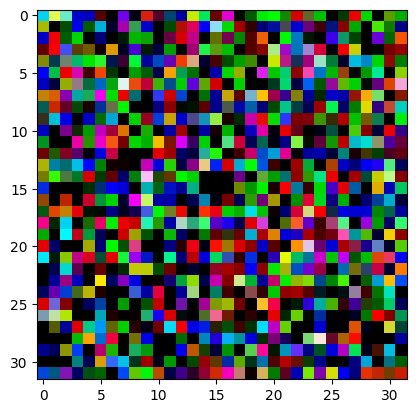

In [26]:
pyplot.imshow(X[0])

In [27]:
model = define_discriminator()

dataset = load_real_samples()

**GENERATOR**

In [28]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

In [29]:
def define_generator(latent_dim):
    model=Sequential();
    n_nodes = 256*4*4

    model.add(Dense(n_nodes,input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4,4,256)))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2) , padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2) , padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2) , padding='same'))
    model.add(LeakyReLU(alpha=0.2))


    model.add(Conv2D(3,(3,3) , activation = 'tanh' , padding='same'))
    return model

In [30]:
latent_dim = 100
model = define_generator(latent_dim)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 128)         524416    
 anspose)                                                        
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                           

In [31]:
def generate_latent_points(latent_dim, n_samples):
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [32]:
x_input = generate_latent_points(100,64)
x_input
np.shape(x_input)

(64, 100)

In [33]:
print(x_input.shape)

(64, 100)


In [34]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = np.zeros((n_samples,1))
    return X,y

1/1 [==============================] - 0s 364ms/step


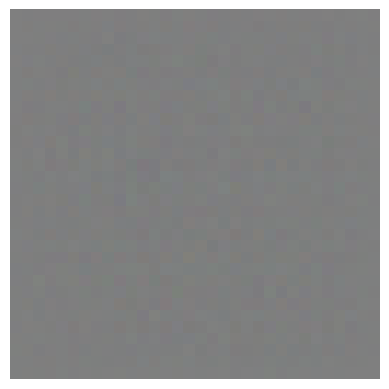

(10, 32, 32, 3)

In [35]:
latent_dim = 100

model = define_generator(latent_dim)

n_samples = 10

X, _ = generate_fake_samples(model, latent_dim, n_samples)
X=(X+1)/2.0

for i in range(n_samples):
    pyplot.plot(10,10,i+1)
    pyplot.axis('off')
    pyplot.imshow(X[i])
pyplot.show()
np.shape(X)

In [36]:
def define_gan(g_model, d_model):
    d_model.trainable = False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt = Adam(learning_rate = 0.0002, beta_1 = 0.5)
    model.compile(loss = 'binary_crossentropy', optimizer=opt)
    return model

In [37]:
latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
gan_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 780545    
                                                                 
Total params: 2246660 (8.57 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 780545 (2.98 MB)
_________________________________________________________________


In [38]:
def train(g_model,d_model,gan_model,dataset,latent_dim, n_epochs=20,n_batch = 32):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)

    for i in range(n_epochs):
        for j in range(bat_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = np.ones((n_batch,1))
            g_loss = gan_model.train_on_batch(X_gan , y_gan)
            print('> %d. %d/%d, d1 = %.3f, d2 = %.3f g = %.3f' %(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))

        if (i+1)%40 == 0:
            summarize_performance(i,g_model,d_model, dataset,latent_dim)

In [39]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples = 100):
    X_real,y_real = generate_real_samples(dataset,n_samples)
    _, acc_real = d_model.evaluate(X_real, y_real,verbose = 0)
    x_fake , y_fake = generate_fake_samples(g_model,latent_dim,n_samples)
    _, acc_fake = d_model.evaluate(x_fake , y_fake,verbose = 0)
    print('> Accuracy Real: %.0f%%, Fake: %.0f%%' % (acc_real*100, acc_fake*100))
    save_plot(x_fake,epoch)
    path = '/content/drive/MyDrive/GAN/GAN_Mine14/'
    filename = 'gan_model_%03d.h5' % (epoch+1)
    g_model.save(path+filename)

In [40]:
def save_plot(examples,epoch, n =1):
    examples = (examples+1) /2.0
    for i in range(n*n):
        pyplot.subplot(n,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i])
        path = '/content/drive/MyDrive/GAN/GAN_Mine14/'
        filename = 'gan_plot_e%03d.jpg' % (epoch+1)
        pyplot.savefig(path + filename)
    pyplot.close()

In [41]:
train(g_model,d_model,gan_model,dataset,latent_dim, n_epochs=1400,n_batch = 32)

1/1 [==============================] - 0s 216ms/step
> 1. 1/7, d1 = 0.697, d2 = 0.694 g = 0.692
1/1 [==============================] - 0s 179ms/step
> 1. 2/7, d1 = 0.622, d2 = 0.696 g = 0.690
1/1 [==============================] - 0s 109ms/step
> 1. 3/7, d1 = 0.567, d2 = 0.700 g = 0.687
1/1 [==============================] - 0s 112ms/step
> 1. 4/7, d1 = 0.495, d2 = 0.707 g = 0.681
1/1 [==============================] - 0s 178ms/step
> 1. 5/7, d1 = 0.435, d2 = 0.718 g = 0.671
1/1 [==============================] - 0s 129ms/step
> 1. 6/7, d1 = 0.367, d2 = 0.737 g = 0.656
1/1 [==============================] - 0s 111ms/step
> 1. 7/7, d1 = 0.345, d2 = 0.769 g = 0.640
1/1 [==============================] - 0s 130ms/step
> 2. 1/7, d1 = 0.297, d2 = 0.794 g = 0.631
1/1 [==============================] - 0s 115ms/step
> 2. 2/7, d1 = 0.249, d2 = 0.806 g = 0.645
1/1 [==============================] - 0s 111ms/step
> 2. 3/7, d1 = 0.231, d2 = 0.782 g = 0.687
1/1 [==============================] - 0

KeyboardInterrupt: 